In [1]:
!nvidia-smi

Mon Mar  3 16:46:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image


In [5]:

model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


100%|██████████| 104k/104k [00:00<00:00, 42.3MB/s]


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 57.9ms
Speed: 12.2ms preprocess, 57.9ms inference, 419.7ms postprocess per image at shape (1, 3, 640, 384)


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BVXlWvetB8rv39GwVQPB")
project = rf.workspace("project-o1umy").project("eoc_mfc")
version = project.version(7)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EOC_MFC-7 in yolov8:: 100%|██████████| 3506/3506 [00:00<00:00, 5540.78it/s]


In [7]:
import os
print(os.listdir("/content/datasets"))


['EOC_MFC-7']


In [8]:
import glob
print(glob.glob("/content/datasets/**/data.yaml", recursive=True))

['/content/datasets/EOC_MFC-7/data.yaml']


In [9]:
%cd {HOME}/datasets/EOC_MFC-7
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/EOC_MFC-7/data.yaml epochs=100 imgsz=640 batch=16 plots=True


/content/datasets/EOC_MFC-7
100% 6.25M/6.25M [00:00<00:00, 96.6MB/s]
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/EOC_MFC-7/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

In [10]:
!ls {HOME}/runs/detect/train
%cd {HOME}/datasets/EOC_MFC-7

ls: cannot access '/content/runs/detect/train': No such file or directory
/content/datasets/EOC_MFC-7


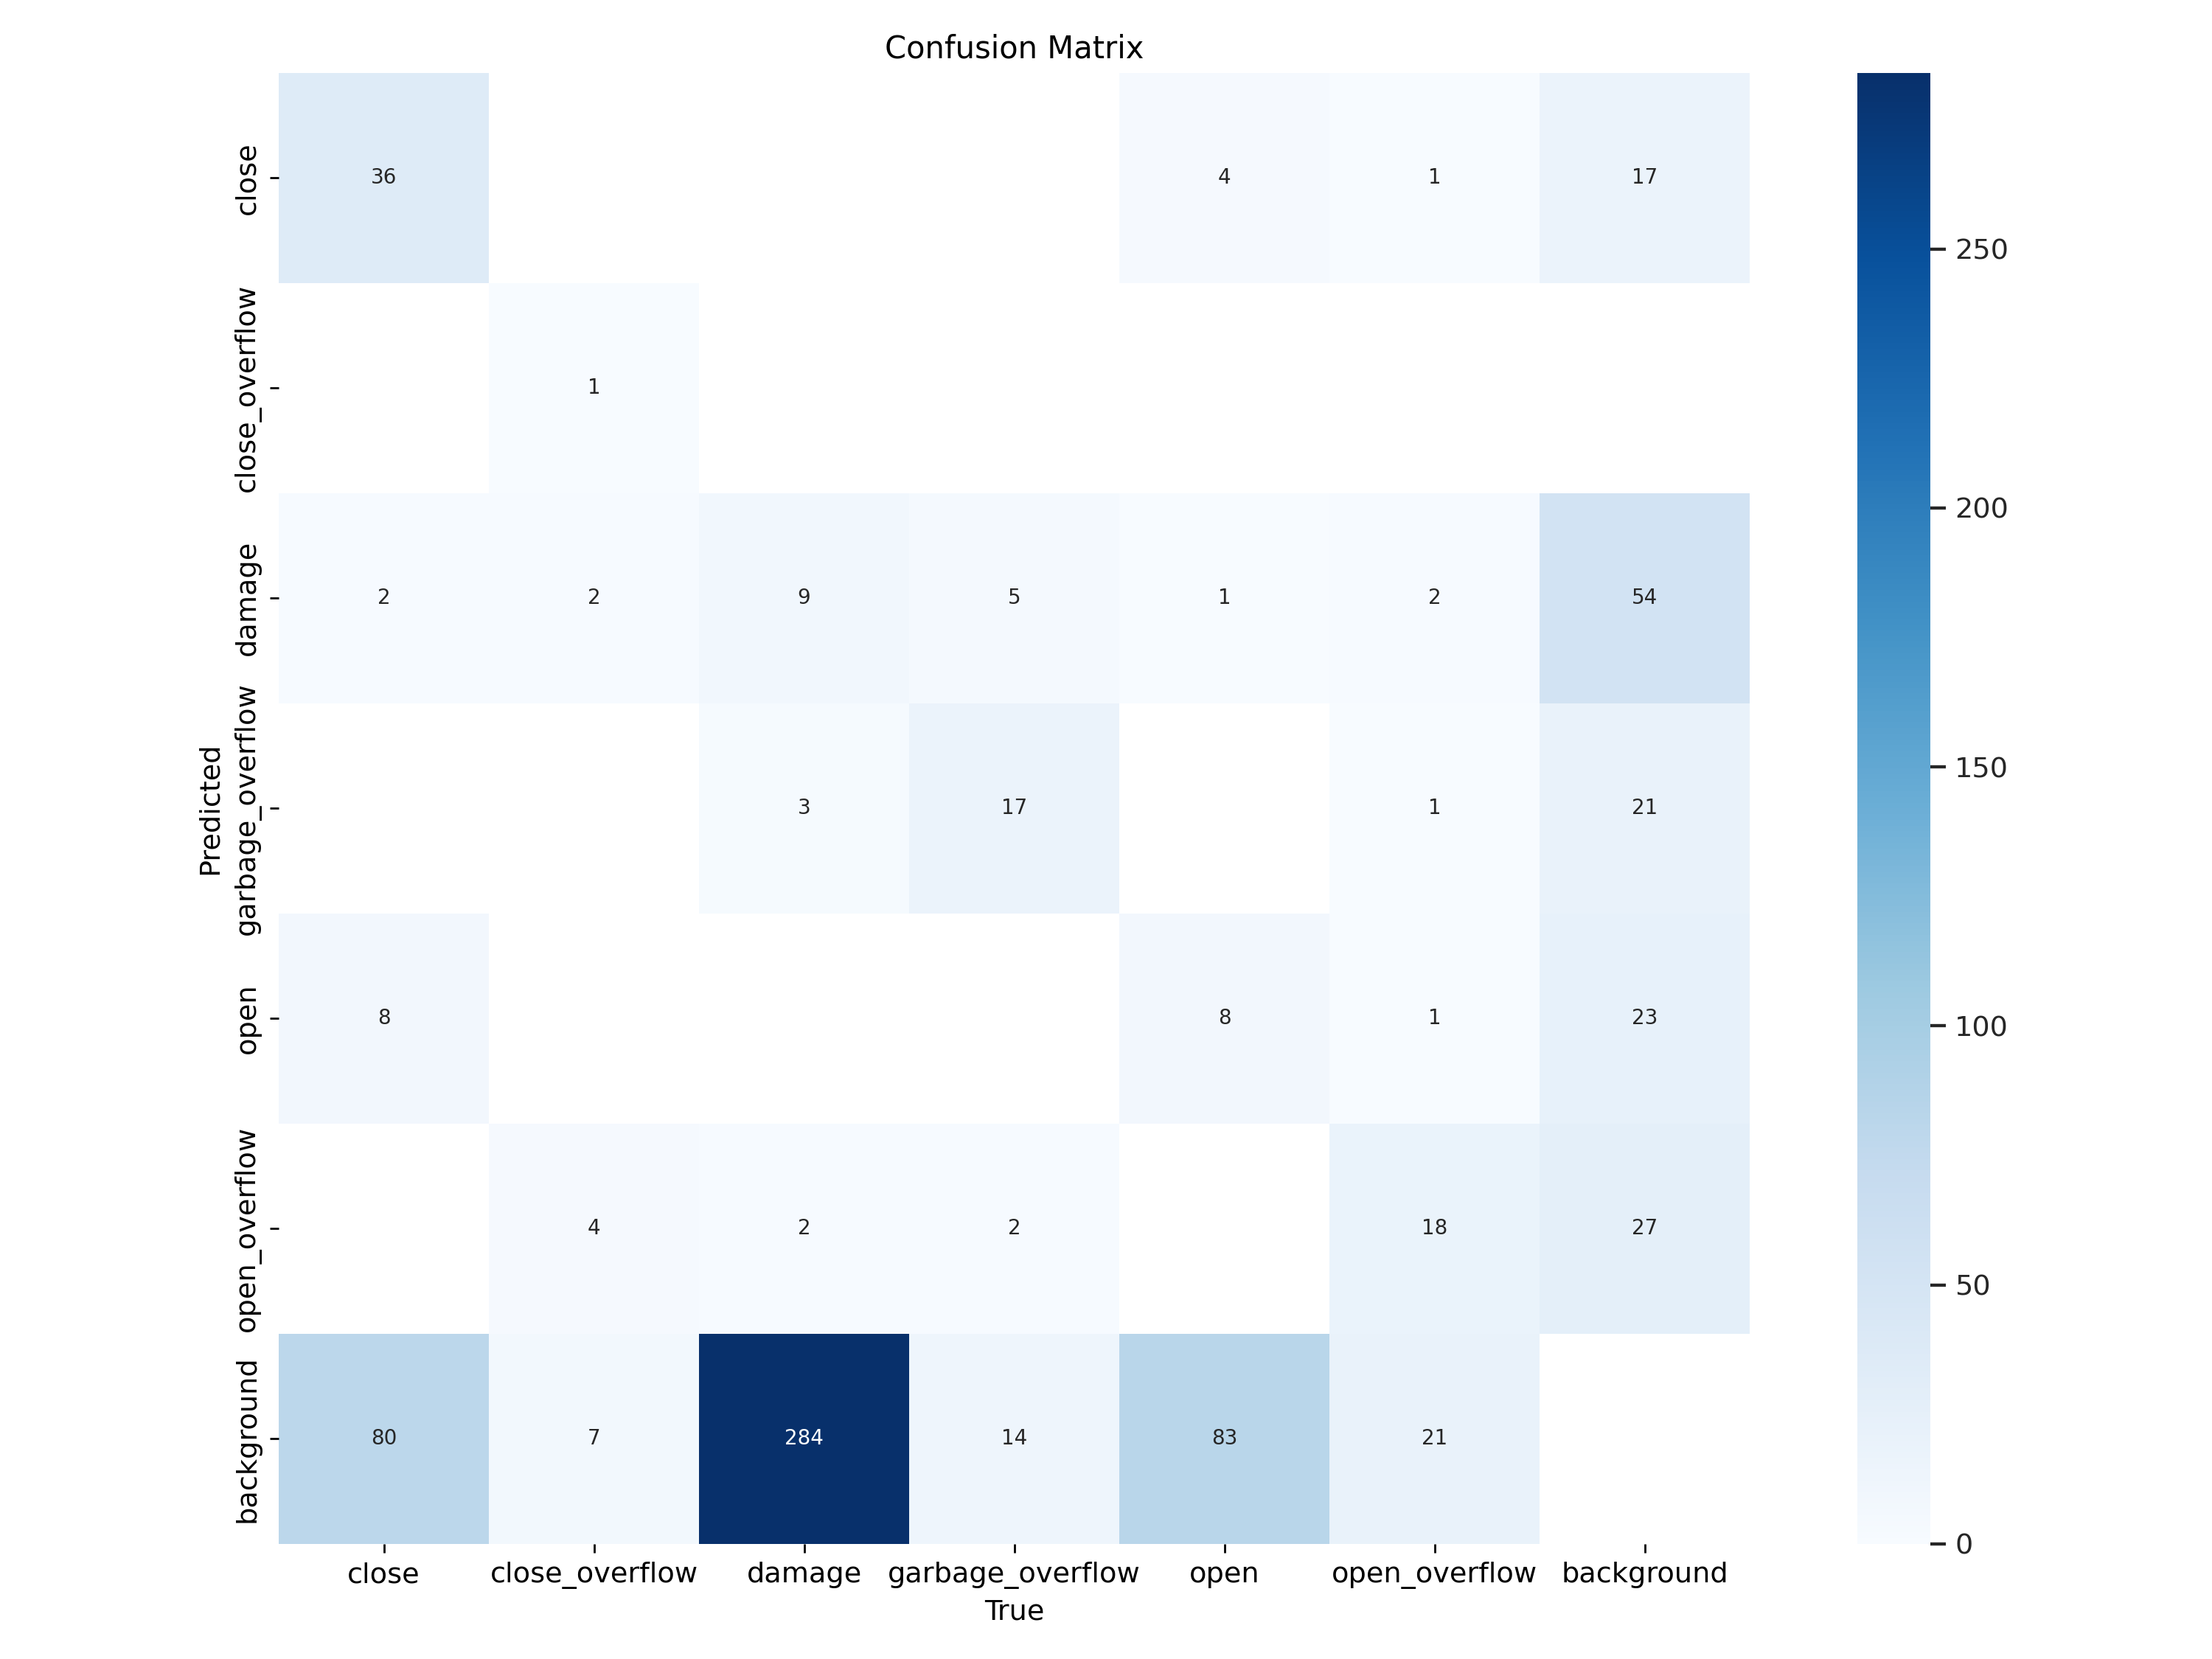

In [11]:
Image(filename=f'{HOME}/datasets/EOC_MFC-7/runs/detect/train/confusion_matrix.png', width=600)


/content


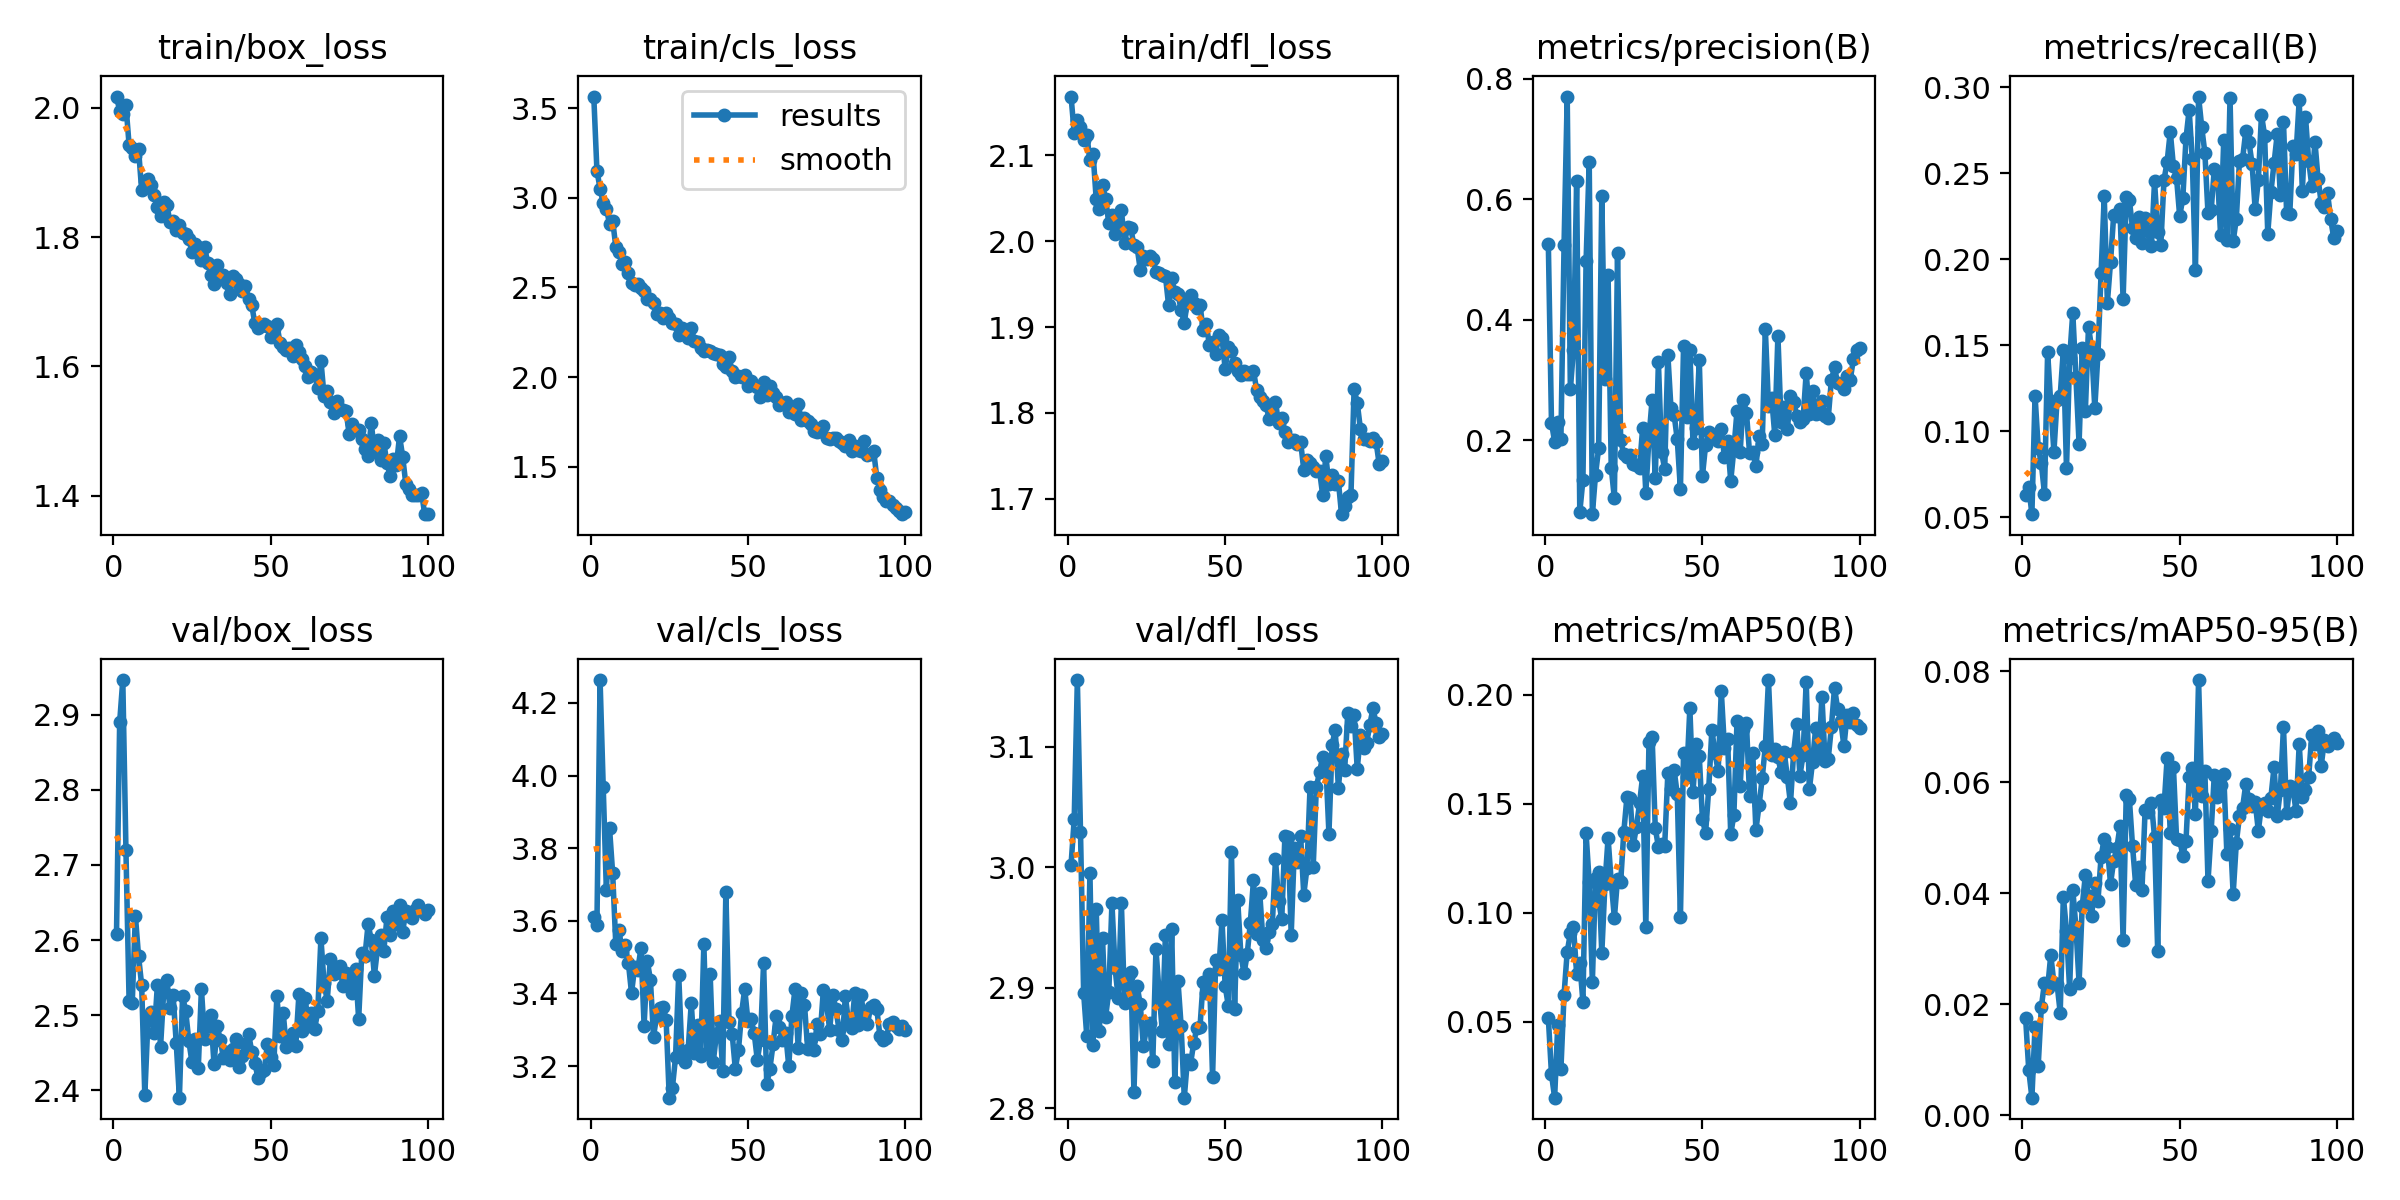

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/EOC_MFC-7/runs/detect/train/results.png', width=600)


/content


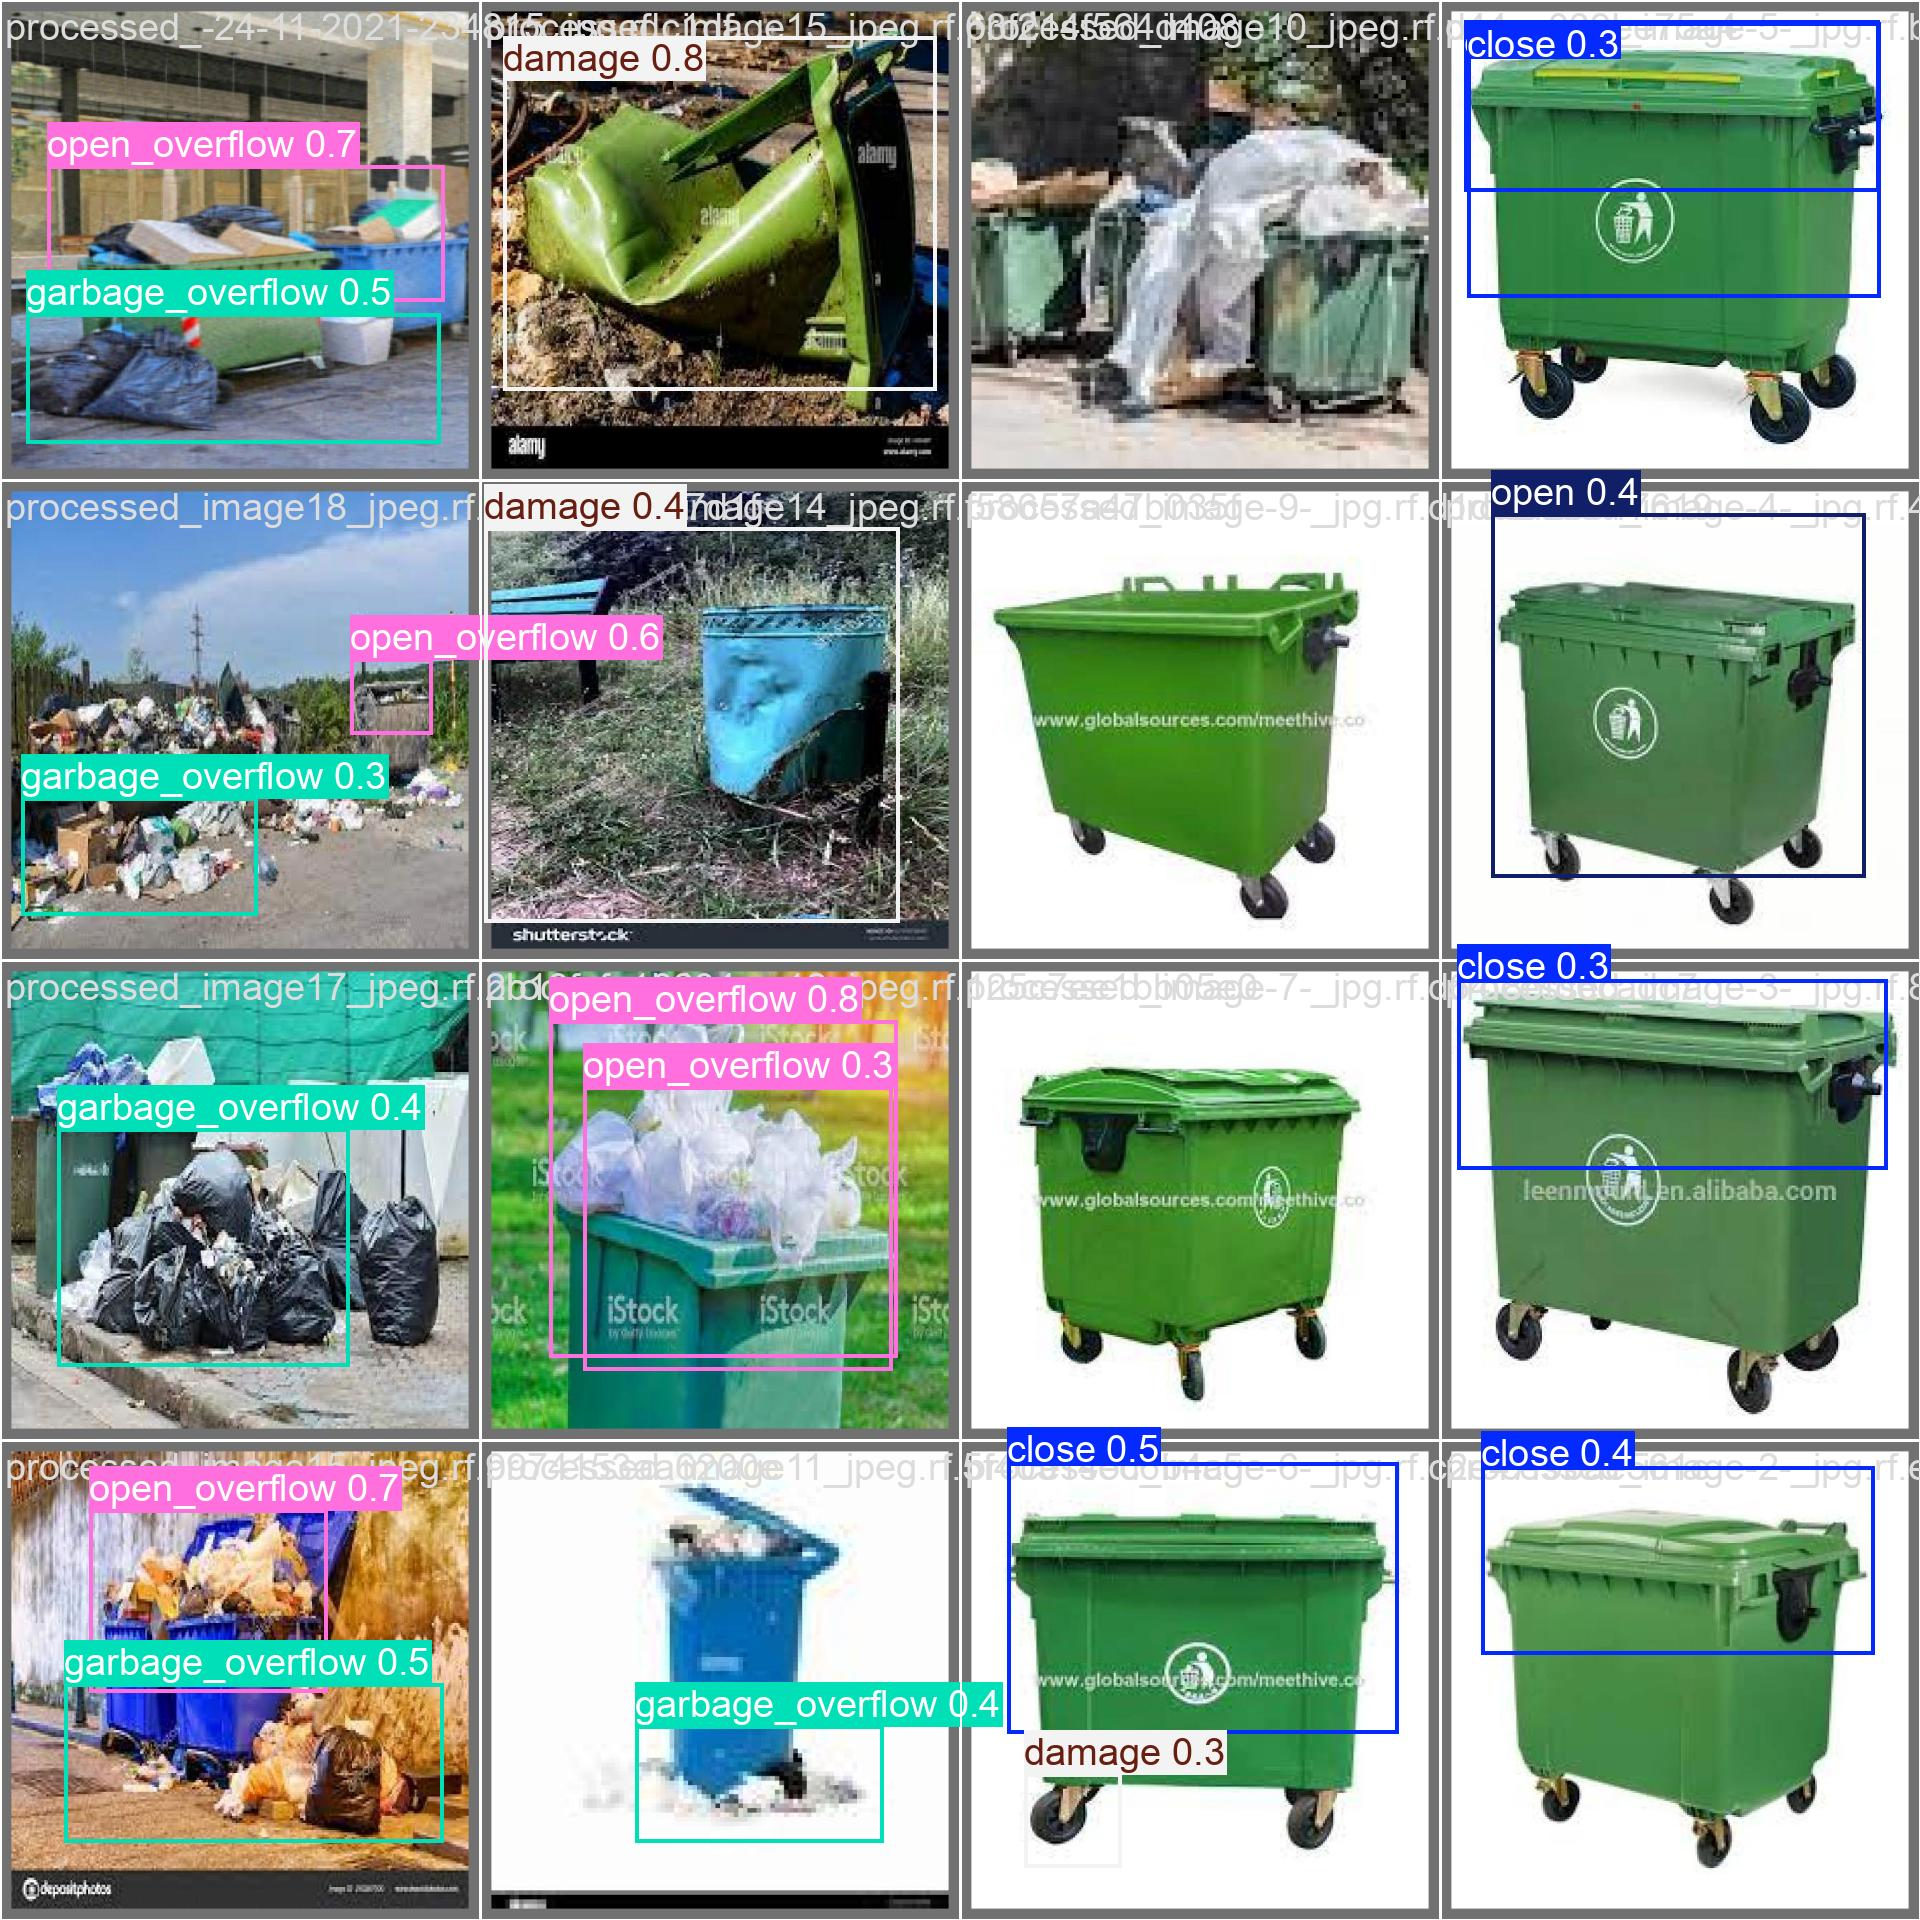

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/EOC_MFC-7/runs/detect/train/val_batch0_pred.jpg', width=600)


In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/EOC_MFC-7/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

image 1/170 /content/datasets/EOC_MFC-7/test/images/processed_-22_jpg.rf.583d9dce84335c9b2cddf3479d6cd70e.jpg: 640x640 2 garbage_overflows, 1 open_overflow, 9.0ms
image 2/170 /content/datasets/EOC_MFC-7/test/images/processed_-24-11-2021-234908_jpg.rf.e31c9bc159a9fe1d6b2a90bded1c644c.jpg: 640x640 1 close, 1 open, 7.5ms
image 3/170 /content/datasets/EOC_MFC-7/test/images/processed_-24-11-2021-235001_jpg.rf.006419091b819234ecb2f1617ea0da64.jpg: 640x640 (no detections), 7.4ms
image 4/170 /content/datasets/EOC_MFC-7/test/images/processed_48_jpg.rf.8967875cba61eac6a0474f93b0ca439e.jpg: 640x640 1 damage, 7.4ms
image 5/170 /content/datasets/EOC_MFC-7/test/images/processed_IMG_20211120_093001_jpg.rf.c579d1b1d21d73e9bd4c80ab4dbe2f97.jpg: 640x640 1 garbage_overflow, 7.4ms
image 6/170 /content/datasets/EOC_MFC-7/test/images/proc